<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/deeplearning.ai/tf/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation

Data augmentation is a technique that increases teh fiversity of your training set by applying random (but realistic) transformations such as image rotation. TF enables a couple of approach to implement data augmentation: `keras preprocessing layers` and `tf.image`.

## Setup

In [1]:
!nvidia-smi

Sat Nov  7 23:21:03 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

f'Tensorflow version: {tf.__version__}'

'Tensorflow version: 2.3.0'

## Download a dataset

This tutorial uses tf_flowers dataset.

In [3]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[:90%]'],
    with_info=True,
    as_supervised=True,
)

print(f'# images train_ds: {tf.data.experimental.cardinality(train_ds)}')
print(f'# images val_ds: {tf.data.experimental.cardinality(val_ds)}')
print(f'# images test_ds: {tf.data.experimental.cardinality(test_ds)}')

# images train_ds: 2936
# images val_ds: 367
# images test_ds: 3303


The flowers dataset has five classes.

In [4]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


Let's retrive an image from the dataset and use it to demostrate data augmentation.

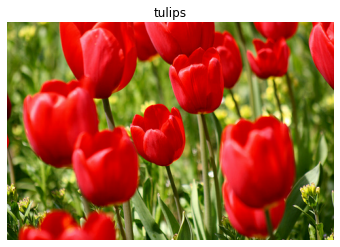

In [5]:
get_label_name = metadata.features['label'].int2str
image, label = next(iter(train_ds))
_ = plt.imshow(image);
_ = plt.title(get_label_name(label));
plt.axis('off');

### User Keras processing layers

#### Resizing and scaling

You can use preprocessing layers to resize your images to a consistent shape, and to rescale pixel values.

In [6]:
IMG_SIZE = 180

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1.0/255.0)
])

Note: the rescaling layer above standardize pixel values to `[0, 1]`. If instead you wanted `[-1, 1]`, you would write `Rescaling(1.0/127.5, offset=-1)`.

You can see the result of applying these layers to an image.

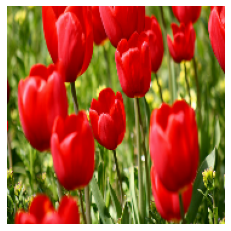

In [7]:
result = resize_and_rescale(image)
plt.axis('off')
_ = plt.imshow(result)

You can verify the pixels are in `[0, 1]`.

In [8]:
f'Min and max pixel values: {result.numpy().min()},  {result.numpy().max()}'

'Min and max pixel values: 0.0,  1.0'

#### Data Augmentation

You can use preprocessing layers for data augmentation as well. Let's create a few preprocessing layers and apply them repeatedly to the same image.

In [9]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [10]:
image.shape

TensorShape([333, 500, 3])

In [11]:
# add image to batch
batch_image = tf.expand_dims(image, 0)

In [13]:
batch_image.shape

TensorShape([1, 333, 500, 3])

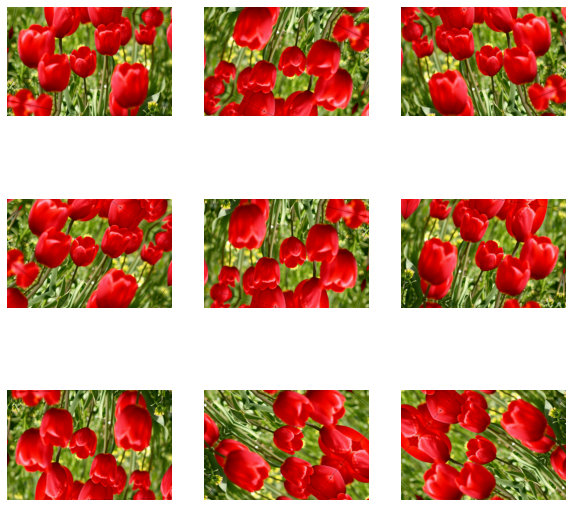

In [12]:
plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(batch_image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis('off')

There are a variety of processing layers you can use for data augmentation including `layers.RandomContrast`, `layers.RandomCrop`, `layers.RandomZoom`, and others.

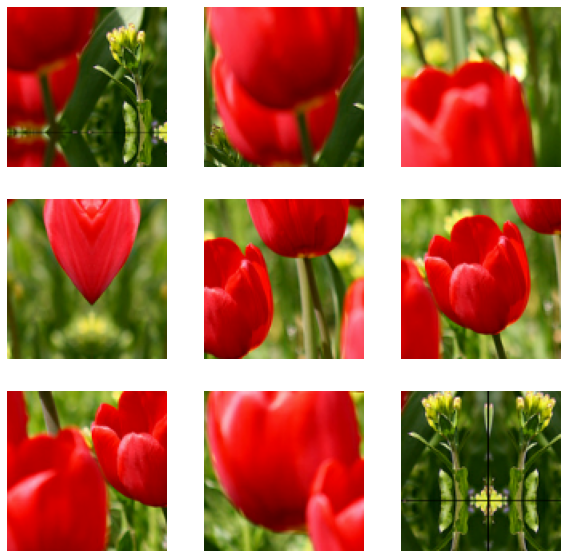

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3)),
  layers.experimental.preprocessing.RandomCrop(height=100, width=100)
])

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation(batch_image)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis('off')